# Problem Set 2, due April 27th at 3:30 pm

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 'pobre'|
|progresa |treatment = 'basal'|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

In [1]:
import sys; print(sys.version)
%matplotlib inline


2.7.11 |Anaconda 4.0.0 (x86_64)| (default, Dec  6 2015, 18:57:58) 
[GCC 4.2.1 (Apple Inc. build 5577)]


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn 

In [3]:
progresa_data = pd.read_csv('/Users/abhi/Documents/UW/Courses/Spring_Quarter_17/INFX-574/data/Problem_Set_2/progresa_sample.csv')
progresa_data.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


---
##Part 1: Descriptive analysis

### 1.1	Summary Statistics

a) Present number of missing observations for every single variable


In [4]:
progresa_data.isnull().sum(axis = 0)

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

b) Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [5]:
x = progresa_data.columns - ['year', 'folnum', 'village']
d= progresa_data[x].describe()
d

/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


,age,dist_cap,dist_sec,fam_n,grc,grc97,hohage,hohedu,hohsex,hohwag,indig,min_dist,sc,sc97,sex,welfare_index
count,77250.000000,77250.000000,77250.000000,77250.000000,70701.000000,77250.000000,77240.000000,77250.000000,77230.000000,77250.000000,76950.000000,77250.000000,68797.000000,73378.000000,77226.000000,77040.000000
mean,11.366460,147.674452,2.418910,7.215715,3.963537,3.705372,44.436717,2.768104,0.925185,586.985312,0.298324,103.447520,0.819818,0.813922,0.512211,690.346564
std,3.167744,76.063134,2.234109,2.352900,2.499063,2.572387,11.620372,2.656106,0.263095,788.133664,0.457525,42.089441,0.384342,0.389172,0.499854,139.491130
min,6.000000,9.465392,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,9.465392,0.000000,0.000000,0.000000,180.000000
25%,9.000000,92.327050,0.574000,6.000000,2.000000,1.000000,36.000000,0.000000,1.000000,120.000000,0.000000,70.518238,1.000000,1.000000,0.000000,597.000000
50%,11.000000,132.001494,2.279000,7.000000,4.000000,4.000000,43.000000,2.000000,1.000000,500.000000,0.000000,111.228612,1.000000,1.000000,1.000000,685.000000
75%,14.000000,184.445225,3.582000,9.000000,6.000000,6.000000,51.000000,4.000000,1.000000,750.000000,1.000000,138.446009,1.000000,1.000000,1.000000,770.000000
max,17.000000,359.774457,14.879000,24.000000,14.000000,14.000000,98.000000,20.000000,1.000000,14000.000000,1.000000,170.457647,1.000000,1.000000,1.000000,1294.000000


In [13]:
mean = d[d.index == 'mean'].T
std = d[d.index == 'std'].T
pd.concat([mean,std], axis = 1)


,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


In [16]:
import scipy as sc

In [17]:
prog = progresa_data[progresa_data['year'] == 97]
s = prog[x]
s = s[s['poor'] == 'pobre']
control = s[s['progresa'] != 'basal']
treatment = s[s['progresa'] == 'basal']
d_control = control.describe()
d_treatment = treatment.describe()
avg_control = d_control[d_control.index == 'mean'].T
avg_control = avg_control.rename(columns = {'mean': 'Average value (Control villages)'})
avg_treatment = d_treatment[d_treatment.index == 'mean'].T
avg_treatment= avg_treatment.rename(columns = {'mean': 'Average value (Treatment villages)'})
test = pd.concat([avg_control,avg_treatment], axis = 1)

In [54]:
diff = [] 
pv = [] 
def calc_diff(s1, s2,diff, pv):
    d, p = sc.stats.ttest_ind(s1,s2)
    diff.append(d)
    pv.append(p)
    return 

In [48]:
for thing in test.index:
    calc_diff(treatment[thing], control[thing])

test['diff'] = diff
test['pv'] = pv
test

,Average value (Control villages),Average value (Treatment villages),diff,pv
age,10.742023,10.716991,-0.708630,4.785594e-01
dist_cap,153.769730,150.829074,-3.339081,8.415005e-04
dist_sec,2.507662,2.453122,-2.100433,3.569843e-02
fam_n,7.302469,7.281327,-0.794167,4.271039e-01
grc,3.543050,3.531599,-0.400196,6.890151e-01
grc97,3.543050,3.531599,-0.400196,6.890151e-01
hohage,44.276918,43.648828,NaN,NaN
hohedu,2.590348,2.663139,2.541229,1.105093e-02
hohsex,0.922947,0.924656,NaN,NaN
hohwag,573.163558,544.339544,-3.594588,3.253835e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

<b> A </b> : 

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

hohedu
0    0.776137
1    0.768537
2    0.794552
3    0.802956
4    0.842951
Name: sc, dtype: float64
              sc
hohedu          
0       0.776137
1       0.768537
2       0.794552
3       0.802956
4       0.842951
5       0.849835
6       0.878469
7       0.889535
8       0.900000
9       0.925023
10      0.865385
11      0.974359
12      0.982955
13      0.959459
14      0.880952
15      0.900000
16      0.941176
17      0.933333
18      1.000000
20      0.500000


([<matplotlib.axis.XTick at 0x1148478d0>,
 <a list of 20 Text xticklabel objects>)

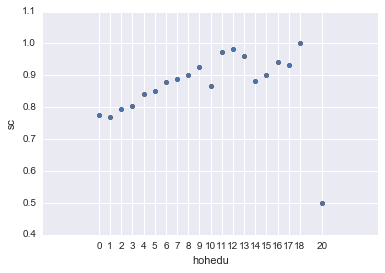

In [23]:
scatter = prog.pivot_table(values='sc', index = 'hohedu')
print scatter.head()
sframe = pd.DataFrame(scatter)
print sframe
sframe.reset_index().plot(kind = 'scatter', x = 'hohedu', y = 'sc')
plt.xticks(sframe.index)

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

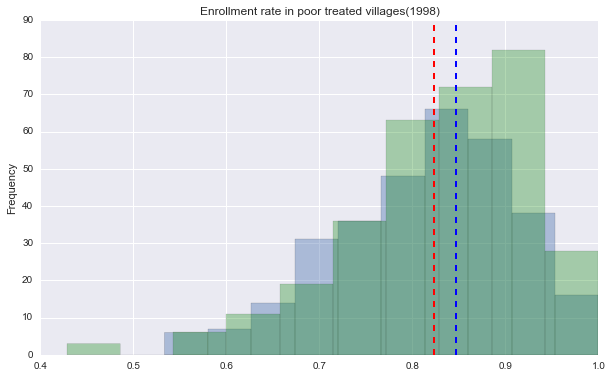

In [24]:
v1 = prog[(prog['poor'] == 'pobre')&(prog['progresa'] == 'basal')]
v2 = progresa_data[(progresa_data['poor'] == 'pobre')&(progresa_data['progresa']=='basal')&(progresa_data['year']==98)]
all_avg_v1 = v1['sc'].mean()
all_avg_v2 = v2['sc'].mean()
groupby_v1 = v1.pivot_table(values='sc', index='village')
groupby_v2 = v2.pivot_table(values='sc', index='village')
fig, ax = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(10)
g1 = groupby_v1.plot(ax = ax, kind='hist', title = 'Enrollment rate in poor treated villages(1997)', alpha=0.4)
g1.axvline(x = all_avg_v1, linewidth = 2, color ='r', linestyle='--')
g1.axvline(x = all_avg_v2, linewidth = 2, color ='b', linestyle='--')
g2 = groupby_v2.plot(ax= ax, kind='hist', title = 'Enrollment rate in poor treated villages(1998)', alpha=0.3, color='g')

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [61]:
new_data.isnull().sum()

year                0
sex                12
indig             150
dist_sec            0
sc               6517
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     105
hohsex             10
hohage              5
age                 0
village             0
folnum              0
grc97               0
sc97             1936
dtype: int64

In [57]:
new_data = progresa_data[progresa_data['year'] == 98]
new_t = new_data[(new_data['poor'] == 'pobre')&(new_data['progresa'] == 'basal')]
new_c = new_data[(new_data['poor'] == 'pobre')&(new_data['progresa'] != 'basal')]
avg_e_t = new_t.pivot_table(index= 'village', values = 'sc')
avg_e_x = new_c.pivot_table(index = 'village', values = 'sc')
t = []
p = [] 
calc_diff(avg_e_t, avg_e_x, t, p)
print t
print p 

[2.5241266257746298]
[0.011905294137542672]


In [53]:
grade_dist = progresa_data.pivot_table(index = 'age', values = 'progresa', columns = 'grc', aggfunc = 'count', margins = True)

grc,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,All
age,,,,,,,,,,,,,,,,
6,2679.0,807.0,82.0,97.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3666.0
7,1406.0,4395.0,958.0,190.0,6.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7327.0
8,405.0,1970.0,3664.0,890.0,71.0,5.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,7329.0
9,182.0,715.0,2050.0,3070.0,699.0,73.0,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7090.0
10,153.0,305.0,940.0,1989.0,2818.0,648.0,61.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,7169.0
11,115.0,140.0,494.0,1020.0,1976.0,2678.0,548.0,38.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,7305.0
12,124.0,110.0,272.0,571.0,1018.0,1996.0,2429.0,361.0,38.0,1.0,NaN,NaN,NaN,NaN,NaN,7209.0
13,103.0,91.0,170.0,364.0,589.0,1117.0,2510.0,1422.0,361.0,25.0,NaN,NaN,NaN,NaN,NaN,7104.0
14,156.0,60.0,157.0,251.0,355.0,671.0,2244.0,1069.0,1242.0,241.0,10.0,NaN,NaN,NaN,1.0,6839.0


### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages'.
* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?